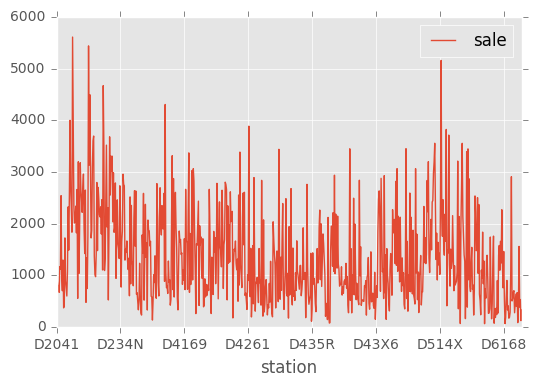

In [1]:
from sklearn.linear_model import LinearRegression
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date,timedelta
import matplotlib
plt.close('all')
matplotlib.style.use('ggplot')
conn = sqlite3.connect('hackson.db')
#a=pd.read_sql('SELECT substr(列帳日期,1,3)+1911 as yyyy ,substr(列帳日期,4,2) as mm,substr(列帳日期,6,2)as dd FROM "12加油站每日銷售發票張數V3UTF8";',conn)
#sqlstr="SELECT 站代碼 as station,avg(主油品) as sale ,nextdifference FROM 加油站每日銷售發票張數 a , 加油站服務資訊utf821 b where a.站代碼=b.站代號 and  縣市='新竹縣' \
sqlstr="SELECT 站代碼 as station,avg(主油品) as sale  FROM 加油站每日銷售發票張數  where \
         weekno<6 group by  站代碼  order by 站代碼 ;"
pdoil=pd.read_sql(sqlstr,conn)
pdoil.plot(x='station',y='sale');
plt.show()
for i in range(len(pdoil)):
   station=pdoil.iloc[[i][0]][0]
   #print(station)      
   sale=pdoil.iloc[i,1]
   print(sale)
   updatesql="update 加油站服務資訊utf821 set avgweekdaysale=%s  where  站代號 ='%s'" %(sale,station )
   conn.execute(updatesql)
   conn.commit()
conn.close()

     

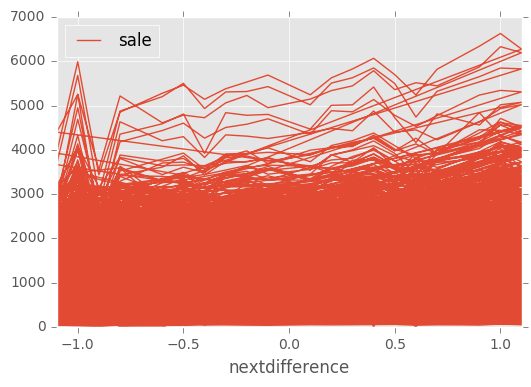

In [32]:
from sklearn.linear_model import LinearRegression
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date,timedelta
import matplotlib
plt.close('all')
matplotlib.style.use('ggplot')
conn = sqlite3.connect('hackson.db')
#a=pd.read_sql('SELECT substr(列帳日期,1,3)+1911 as yyyy ,substr(列帳日期,4,2) as mm,substr(列帳日期,6,2)as dd FROM "12加油站每日銷售發票張數V3UTF8";',conn)
#sqlstr="SELECT 站代碼 as station,avg(主油品) as sale ,nextdifference FROM 加油站每日銷售發票張數 a , 加油站服務資訊utf821 b where a.站代碼=b.站代號 and  縣市='新竹縣' \
sqlstr="SELECT 站代碼 as station,avg(主油品) as sale ,nextdifference FROM 加油站每日銷售發票張數 a , 加油站服務資訊utf821 b where a.站代碼=b.站代號  \
    and weekno>5 group by  站代碼,nextdifference  order by 站代碼,nextdifference ;"
pdoil=pd.read_sql(sqlstr,conn)
pdoil.plot(x='nextdifference',y='sale');
plt.show()


In [19]:
from sklearn.linear_model import LinearRegression
regr =  LinearRegression()
a=10
b=10
c=10
station='test'
updatesql="update 加油站服務資訊utf821 set slope=%s, interception=%s, r2=%s \
    where  站代號 ='%s'" %(a,b,c,station )
print(updatesql)

update 加油站服務資訊utf821 set slope=10, interception=10, r2=10     where  站代號 ='test'


In [33]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import preprocessing
x=[]
y=[]
oldstation=pdoil.iloc[[0][0]][0]

def regression(station,x,y):
    npx=np.array(list(x) )
    npx=npx.reshape(-1,1)
    npy=np.array(list(y))
    npy=npy.reshape(-1,1)
    regr =  LinearRegression()
    #print(len(npx), ' x=',npx)
    #print(len(npy), ' y=',npy)
    regr.fit(npx,npy)
    #print('Coefficient:{}'.format(regr.coef_) )
    print(int(regr.coef_)) 
    #print('Intercept:{}'.format(regr.intercept_) )
    #print(regr.intercept_)
    #print("r square ",regr.score(npx,npy))
    updatesql="update 加油站服務資訊utf821 set slope=%s, interception=%s, r2=%s \
    where  站代號 ='%s'" %(float(regr.coef_),float(regr.intercept_),regr.score(npx,npy),station )
    print("sql=",updatesql)
    conn.execute(updatesql)
    conn.commit()
    
for i in range(len(pdoil)):
   station=pdoil.iloc[[i][0]][0]
   #print(station)      
   sale=pdoil.iloc[i,1]
   #print(sale)
   nextdifference=pdoil.iloc[i,2]
   #x.put(nextdifference, dtype=float)
   #y.put(sale, dtype=float)      
   if(station!= oldstation) :
        print(i,oldstation)
        regression(oldstation,x,y) 
        #sleep(1000)
        x=[]
        y=[]
        x.append(nextdifference)
        y.append(sale)
   else:
      x.append(nextdifference)
      y.append(sale)
   oldstation=station     

print(i,station)
regression(station,x,y) 
conn.close()
#x.reshape(1,-1) 
#y=y.reshape(1,-1)
#x.reshape(-1, 1)
#X.reshape(-1, 1)


20 D2041
212
sql= update 加油站服務資訊utf821 set slope=212.7603810061678, interception=1235.186762832992, r2=0.512759717071     where  站代號 ='D2041'
40 D2042
76
sql= update 加油站服務資訊utf821 set slope=76.20829546355161, interception=856.7366901342165, r2=0.0577054040499     where  站代號 ='D2042'
60 D2044
120
sql= update 加油站服務資訊utf821 set slope=120.0003487992809, interception=776.043994417989, r2=0.246537284243     where  站代號 ='D2044'
80 D2045
116
sql= update 加油站服務資訊utf821 set slope=116.88415147342232, interception=876.6641551896016, r2=0.326292691     where  站代號 ='D2045'
100 D2046
59
sql= update 加油站服務資訊utf821 set slope=59.27507868357611, interception=747.780031528949, r2=0.156076402616     where  站代號 ='D2046'
120 D2047
175
sql= update 加油站服務資訊utf821 set slope=175.3026030623436, interception=1108.0042900299638, r2=0.319755443628     where  站代號 ='D2047'
140 D2048
134
sql= update 加油站服務資訊utf821 set slope=134.3381813275439, interception=1205.8275318712285, r2=0.37558050093     where  站代號 ='D2048'
160 D20